# Tarea 1. Interpolación de Lagrange

Se importan las librerías necesarias para generar las gráficas y para el manejo de matrices y además se definen las funciones plot_contour y plot_surface, donde la primera genera gráficas en colores de los campos u y v y la segunda genera una superficie 3d, donde la altura, es decir la cordenada Z, toma el valor del campo escalar u=f(x,y).

También se define la función rect_grid, la cual genera una malla rectangular dentro de un dominio, esta se usará para evaluar los campos escalares en todo el dominio

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from numpy import ma
from mpl_toolkits.mplot3d import Axes3D

def plot_contourf(x,y,z,title):
    fig, ax = plt.subplots()
    norm = cm.colors.Normalize(vmax=z.max(), vmin=z.min())
    cs = ax.contourf(x, y, z,100,cmap='jet',norm=norm)
    #cmap=cm.PuBu_r
    cbar = fig.colorbar(cs)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
def plot_surface(x,y,z,title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
#ax.zlabel('z')
    Axes3D.plot_surface(ax,X=x,Y=y,Z=z,alpha=0.7)
    plt.show()
#### MAIN PROGRAM
###

def rect_grid(Lx, Ly, nx, ny):
    u"""Create a rectilinear grid for a rectangle
    
    The rectangle has dimensiones Lx by Ly. nx are 

    the number of nodes in x, and ny are the number of nodes
    in y
    """
    x2 = np.linspace(0, 1, nx)
    ## if step is imaginary, its real part(coefficient) is the number of subdivisions of the grid in the axis.
    y, x = np.mgrid[-Ly/2:Ly/2:ny*1j, -Lx/2:Lx/2:nx*1j]
    #print('yvalues',y, 'and x values',x)

    xf=x.flatten()     
    yf=y.flatten()
    
    points=list()
    for i in range(len(xf)):
        points.append((xf[i],yf[i]))
    return x, y,points

Se crea una función que genera los polinomio de interpolación de lagrange para un elemento 1-D, a partir de los valores de 2 nodos. Estos polinomios son dos, uno por cada valor nodal, son de orden 1, es decir lineales, debido a que un polinomio de orden n, pasa a lo sumo por n+1 puntos deseados, según el teorema de Lagrange.

También se calculan a mano las derivadas de dichas funciones y se llaman a partir de la función lagrange1d_diff.

In [5]:
def lagrange1d(x,h):
    ## x0=-h, x1=h, y0=-h, y1=h
    ## 
    ## solo necesito una función porque es cuadrado y está en el centro
    
    ## for l01 k = 0 so i != k, i=1, xi = h, xk=-h 
    
    l01=(x-h)/(-h-h)
    
    ## for l11 k = 1 so i != k, i=0, xi = -h, xk=h 
    l11=(x+h)/(h+h)
    return l01,l11
def lagrange1d_diff(x,h):
    ## x0=-h, x1=h, y0=-h, y1=h
    ## 
    ## solo necesito una función porque es cuadrado y está en el centro
    
    ## for l01 k = 0 so i != k, i=1, xi = h, xk=-h 
    
    l01=(1)/(-h-h)
    
    ## for l11 k = 1 so i != k, i=0, xi = -h, xk=h 
    l11=(1)/(h+h)
    return l01,l11

Se define la función stdm donde se computa la matriz de interpolación en 2D, la cual está compuesta de polinomios de interpolación 1D multiplicados, es decir N(x,y) = N(x)N(y), especificamente para calcular un polinomio de interpolación se multiplica el polinomio interpolador de la fila deseada, por el de la columna deseada. El polinomio para elnodo 0 por ejemplo es una multiplicación del polinomio interpolador para la fila 0 por el polinomio para la columna 0.

Ejm: N(Q=0) = L_fcolumna_0(x)*L_fila_0(y)
Ejm: N(Q=1) = L_fcolumna_1(x)*L_fila_0(y)
Ejm: N(Q=2) = L_fcolumna_1(x)*L_fila_1(y)
Ejm: N(Q=3) = L_fcolumna_0(x)*L_fila_1(y)

donde u_i=NQ_i*uQ

*Los valores nodales para los desplazamientos (u,v) se dan como argumentos a la función.

In [6]:


def stdm(h=1.0,points=[(-1,-1),(1,-1),(1,1),(-1,1)],U_nodes=[0,3,4,5],V_nodes=[0,0,1,2]):
    nodal_values = np.ravel(np.column_stack((U_nodes,V_nodes)))
    inter = np.ravel(np.column_stack((U_nodes,V_nodes)))
    print('inter',inter)
    ## el sentido es antihorario comenzando con el nodo inferior izquierdo
    
    
    #    3   .----------------------------.2
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            | 
    #        |                            |
    #    0   .----------------------------. 1
    
    # denotamos lkn como el polinomio correspondiente a la fila k en una malla con n filas
    cont=0
    u=np.zeros((len(points),2))
  #v=np.zeros(len(points))
    for pair in points:
        l01_x,l11_x=lagrange1d(pair[0],h)
        l01_y,l11_y=lagrange1d(pair[1],h)
        N=np.array([[l01_x*l01_y, 0, l11_x*l01_y,0,l11_x*l11_y,0,l01_x*l11_y,0],
                    [0,l01_x*l01_y,0,l11_x*l01_y,0,l11_x*l11_y,0,l01_x*l11_y]])
        u[cont]=np.dot(N,nodal_values)
        #v[cont]=np.dot(N,nodal_values)
        cont+=1
    return u





La función shape computa las derivadas de la matriz de interpolación para cada uno de los nodos, en este caso esta 
matriz está compuesta de productos de funciones de interpolación 1D por derivadas de dichas funciones.

Con esta matriz de interpolaciòn se obtienen las deformaciones donde 

Exx=du/dx = dNQ/dx uQ
Eyy=dv/dy = dNQ/dy vQ
Exy=du/dy + dv/dx = dNQ/dy uQ +  dNQ/dx vQ


In [7]:
def shape(h=1.0,points=[(-1,-1),(1,-1),(1,1),(-1,1)],U_nodes=[0,3,4,5],V_nodes=[0,0,1,2]):
    nodal_values = np.ravel(np.column_stack((U_nodes,V_nodes)))
    print('nodal_values',nodal_values)
    ## el sentido es antihorario comenzando con el nodo inferior izquierdo
    
    
    #    3   .----------------------------.2
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            |
    #        |                            | 
    #        |                            |
    #    0   .----------------------------. 1
    
    # denotamos lkn como el polinomio correspondiente a la fila k en una malla con n filas
    cont=0
    Ex=np.zeros(len(points))
    Ey=np.zeros(len(points))
    Exy=np.zeros(len(points))
    for pair in points:
        l01_x,l11_x=lagrange1d(pair[0],h)
        l01_y,l11_y=lagrange1d(pair[1],h)
        l01_x_d,l11_x_d=lagrange1d_diff(pair[0],h)
        l01_y_d,l11_y_d=lagrange1d_diff(pair[1],h)
        N=np.array([[l01_x_d*l01_y,0,l11_x_d*l01_y,0,l11_x_d*l11_y, 0,l01_x_d*l11_y,0],
                   [0,l01_x*l01_y_d,0,l11_x*l01_y_d,0,l11_x*l11_y_d,0,l01_x*l11_y_d],
                  [l01_x*l01_y_d,l01_x_d*l01_y,l11_x*l01_y_d,l11_x_d*l01_y,l11_x*l11_y_d,l11_x_d*l11_y,l01_x*l11_y_d,l01_x_d*l11_y]])
        
        [Ex[cont],Ey[cont],Exy[cont]]=np.dot(N,nodal_values)
        cont+=1
    return Ex,Ey,Exy

Se genera una malla rectangular con 11 filas y 11 columnas y para estos puntos se evaluan los desplazamientos u,v en x,y.

se generan graficas de superficie para estos dos campos escalares, de forma independiente.

Se puede observar que en los nodos del cuadrilátero Q=(0,1,2,3), el valor de desplazamiento encontrado al evaluar las funciónes es igual al valor de desplazamiento nodal que se usó para generar la interpolación, por tanto la interpolación está funcionando bien, debido a que respeta estos valores nodales.

Ejm. para la coordenada (-1,-1) los valores Ux,Vy deberían ser 0 debido al apoyo en este punto.
     para la coordenada (-1,1)  los valores Ux, Vy deberían ser Ux=5 Vy=2 y vemos que esta condición se respeta en la gráfica..



inter [0 0 3 0 4 1 5 2]


C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


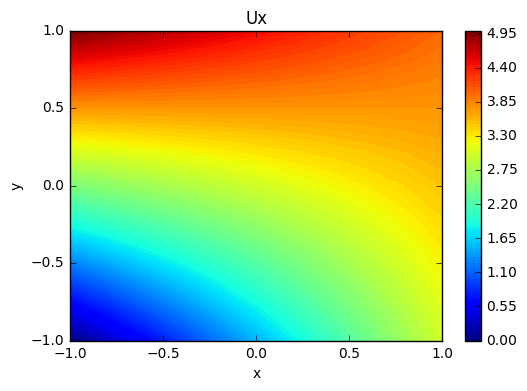

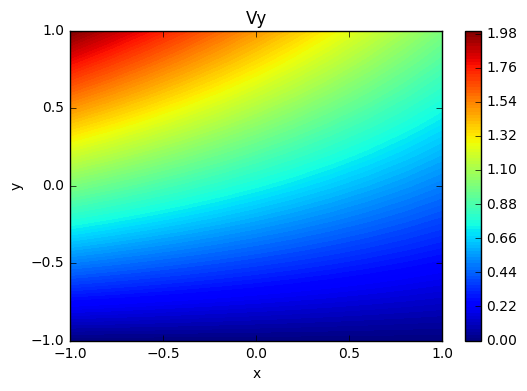

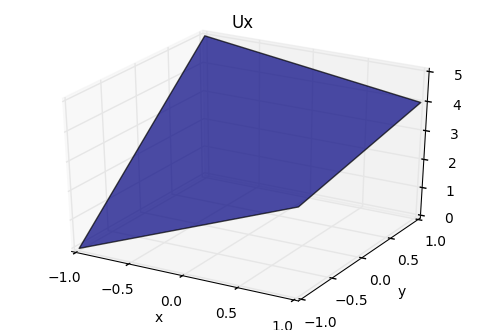

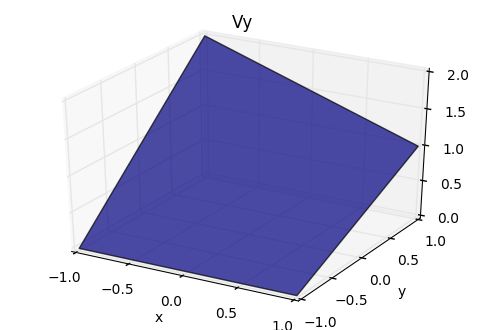

In [9]:
[x,y,points]=rect_grid(2, 2, 11, 11)
u=stdm(points=points)
#u,v=shapefunction(points=points)
v=u[:,1]
u=u[:,0]
# to a grid in order to create a surface
u=np.reshape(u,np.shape(x))
v=np.reshape(v,np.shape(x))
# to avoid color error.
#u = ma.masked_where(u < -np.inf, u)
plot_contourf(x,y,u,'Ux')
plot_contourf(x,y,v,'Vy')

plot_surface(x,y,u,'Ux')
plot_surface(x,y,v,'Vy')


Luego se obtienen las deformaciones unitarias a partir de la función shape, y se grafican los 3 campos escalares.

Una forma de verificar por ejemplo Exx es sabiendo que son rectas que dependen unicamente de y debido a que para este caso
dNx(x)/dx*Ny(y)=f(y) devido a que la derivada de un polinomio de orden 1 como N(x) es una constante.

Una verificación para Eyy es encontrar para el lado derecho, dado por x=1, la pendiente de la recta en este caso la pendiente es = 0.5, valor que es constante en Eyy para toda esa arista.




nodal_values [0 0 3 0 4 1 5 2]


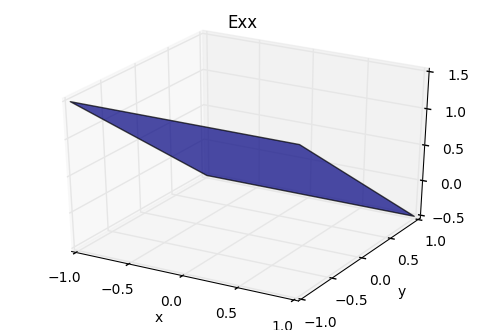

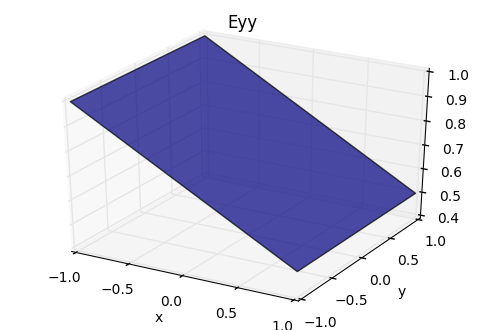

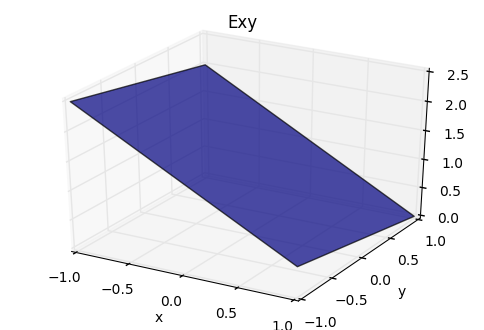

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


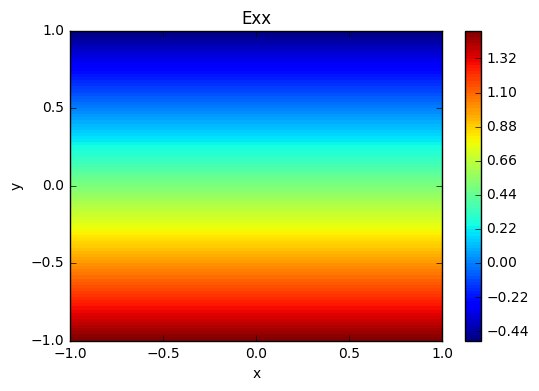

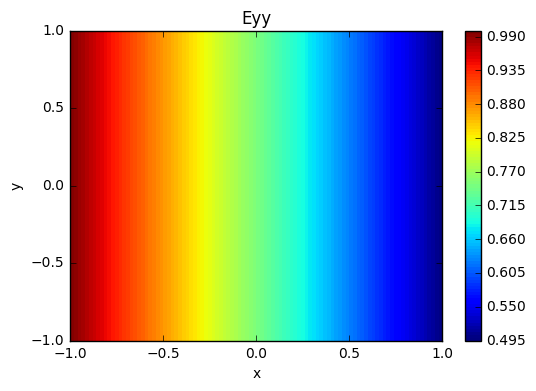

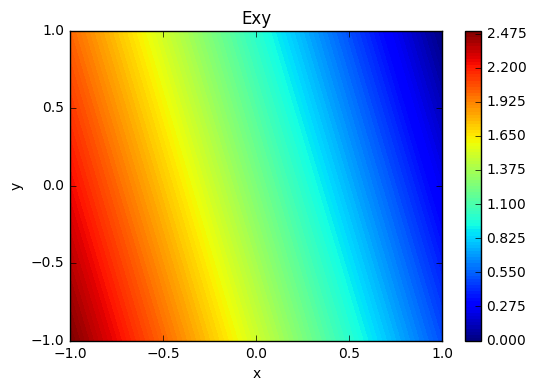

In [11]:

### second problem

Exx,Eyy,Exy=shape(points=points)

Exx=np.reshape(Exx,np.shape(x))
Eyy=np.reshape(Eyy,np.shape(x))
Exy=np.reshape(Exy,np.shape(x))
plot_surface(x,y,Exx,'Exx')
plot_surface(x,y,Eyy,'Eyy')
plot_surface(x,y,Exy,'Exy')

#Exx= ma.masked_where(Exx < -np.inf, Exx)
#Eyy= ma.masked_where(Eyy < -np.inf, Eyy)
#Exy= ma.masked_where(Exy < -np.inf, Exy)
plot_contourf(x,y,Exx,'Exx')
plot_contourf(x,y,Eyy,'Eyy')
plot_contourf(x,y,Exy,'Exy')